
# Project: Gapminder Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project, we will be analizing some data indicators from the <a href="https://www.gapminder.org/data/">gapminder</a> website. We have chosen four indicators: *Life expectancy*, *Income*, *Child mortality*, and *Child fertility*. In the following list, we provide a biref description for each of these four indicators.

<ul>
    <li><strong>Life expectancy:</strong> <em>The average number of years a newborn child would live if current mortality patterns were to stay the same.</em></li>
    <li><strong>Income:</strong> <em>Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).</em></li>
    <li><strong>Child mortality:</strong> <em>Death of children under five years of age per 1,000 live births.</em></li>
    <li><strong>Child fertility:</strong> <em>Babies per woman (total fertility).</em></li>
</ul>

In particular, we will be interested in finding trends over the globe with respect to the above four indicators. Our study covers the period from **1950** to **2019** (the last 70 years). Our independent variables are Income, Child mortality, and Child fertility. And our dependent variable is Life expectancy.

This study have tried to answer the following questions.

<ul>
    <li>Does the life expectancy average for the different regions depend on income, child mortality, or child fertility?</li>
    <li>Have certain regions of the world been growing relatively better than others with respect to the Life expectancy and the other three independent variables?</li>
</ul>

In [1]:
# import statements for all of the packages that are used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from mpl_toolkits.mplot3d import  Axes3D

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

The data that we are going to use in this study are already available in the **gapminder_data** subfolder in our workspace. In the next few steps, we will load our data into dataframes and show some rows of each dataframe.

In [2]:
! ls

gapminder_data	Investigate_a_Dataset.ipynb


In [3]:
! ls gapminder_data

child_mortality_0_5_year_olds_dying_per_1000_born.csv
children_per_woman_total_fertility.csv
income_per_person_gdppercapita_ppp_inflation_adjusted.csv
life_expectancy_years.csv
region_data.csv


In [4]:
# Read Child mortality indicator data.
child_mortality_df = pd.read_csv('gapminder_data/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mortality_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,4.28,4.20,4.14,4.07,4.00,3.94,3.88,3.82,3.76,3.76
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30


In [5]:
# Read Child fertility indicator data.
child_fertility_df = pd.read_csv('gapminder_data/children_per_woman_total_fertility.csv')
child_fertility_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


In [6]:
# Read Income indicator data.
income_df = pd.read_csv('gapminder_data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [7]:
# Read Life expectancy indicator data.
life_expectancy_df = pd.read_csv('gapminder_data/life_expectancy_years.csv')
life_expectancy_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


To study the trends in terms of the specific indicators that we have selected above, we need to group data according to the geographical regions. We get the regions data from <a href="https://www.gapminder.org/about-gapminder/">**Gapminder**</a> website too. We will read these data into a dataframe and merge it with the main dataframe.

In [8]:
# Read regions data.
df_region = pd.read_csv('gapminder_data/region_data.csv')
df_region.head()

,geo,name,four_regions,eight_regions
0,aus,Australia,asia,east_asia_pacific
1,brn,Brunei,asia,east_asia_pacific
2,khm,Cambodia,asia,east_asia_pacific
3,chn,China,asia,east_asia_pacific
4,fji,Fiji,asia,east_asia_pacific


Done! All the data we need are ready now. Let us reshape our dataframe in an acceptable format before we coninue the cleaning and exploration steps.

First, we need to transform years columns into a categorical **year** column for each indicator's dataframe.

In [9]:
column_list = [ 'income','child_mortality', 'child_fertility', 'life_expectancy']
df_list = [income_df, child_mortality_df, child_fertility_df, life_expectancy_df]

for i, (df, column_name) in enumerate(zip(df_list, column_list)):
    df_list[i] = df_list[i].melt(id_vars=['country'], var_name='year', value_name=column_name)

Let us print the first rows of each dataframe after we are done reshaping our data.

In [10]:
for i, df in enumerate(df_list):
    print(df.head())
    print("\n")

       country  year  income
0  Afghanistan  1800     603
1      Albania  1800     667
2      Algeria  1800     715
3      Andorra  1800    1200
4       Angola  1800     618


       country  year  child_mortality
0  Afghanistan  1800            469.0
1      Albania  1800            375.0
2      Algeria  1800            460.0
3      Andorra  1800              NaN
4       Angola  1800            486.0


               country  year  child_fertility
0          Afghanistan  1800             7.00
1              Albania  1800             4.60
2              Algeria  1800             6.99
3               Angola  1800             6.93
4  Antigua and Barbuda  1800             5.00


       country  year  life_expectancy
0  Afghanistan  1800             28.2
1      Albania  1800             35.4
2      Algeria  1800             28.8
3      Andorra  1800              NaN
4       Angola  1800             27.0




Second, we merge the four dataframes into a single one.

In [11]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['country','year'], how='outer'), df_list)
df.head()

,country,year,income,child_mortality,child_fertility,life_expectancy
0,Afghanistan,1800,603.0,469.0,7.00,28.2
1,Albania,1800,667.0,375.0,4.60,35.4
2,Algeria,1800,715.0,460.0,6.99,28.8
3,Andorra,1800,1200.0,NaN,NaN,NaN
4,Angola,1800,618.0,486.0,6.93,27.0


Let us see our merged dataframe info.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 6 columns):
country            58695 non-null object
year               58695 non-null object
income             46513 non-null float64
child_mortality    57045 non-null float64
child_fertility    55384 non-null float64
life_expectancy    55528 non-null float64
dtypes: float64(4), object(2)
memory usage: 3.1+ MB


As we can read from the above info, some columns have missing values. In addition, we need to check the datatype for the **year** column. It must be an integer type to be able to only keep the data for the last **70** years. We do the cleaning in the next section.


### Data Cleaning

In [13]:
# Check the datatype of 'year' column.
type(df['year'])

pandas.core.series.Series

In [14]:
# Check the values' type.
type(df['year'][0])

str

We change the **year**'s column datatype into an **int**, so we can use it in comparison conditions to decide which ranges of years to drop.

In [15]:
df['year'] = df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 6 columns):
country            58695 non-null object
year               58695 non-null int64
income             46513 non-null float64
child_mortality    57045 non-null float64
child_fertility    55384 non-null float64
life_expectancy    55528 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.6+ MB


As we stated in the introduction section, we'll only consider the last **70** years in our study. So we will drop all the rows, with the **year** value is after **2019**, and the ones with the **year** value is before **1950**.

In [16]:
df = df.drop( df[ (df.year >= 1800) & (df.year < 1950) ].index )

In [17]:
df = df.drop( df[ df.year > 2019 ].index )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13650 entries, 28950 to 46952
Data columns (total 6 columns):
country            13650 non-null object
year               13650 non-null int64
income             13510 non-null float64
child_mortality    13650 non-null float64
child_fertility    12880 non-null float64
life_expectancy    13024 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 746.5+ KB


It is clear from the above info that most columns have some missing values. We will see which columns and how many missing values each one has.

In [19]:
df.isnull().sum()

country              0
year                 0
income             140
child_mortality      0
child_fertility    770
life_expectancy    626
dtype: int64

Afterward, we need to see which countries have missing values and for which columns. Because we have data for each country for **70** years, if we group by **country** name, each column must have **70** values if it does not have any **null** values.

In [20]:
df.groupby('country').count().query('life_expectancy < 70')

,year,income,child_mortality,child_fertility,life_expectancy
country,,,,,
Andorra,70,70,70,0,48
Dominica,70,70,70,0,48
Holy See,70,0,70,0,0
Liechtenstein,70,0,70,0,0
Marshall Islands,70,70,70,0,48
Monaco,70,70,70,0,0
Nauru,70,70,70,0,0
Palau,70,70,70,0,0
San Marino,70,70,70,0,0


According to the total of missing values for each column and the result of the above query, we get a list of countries that have some missing values. We decided to drop all rows of these countries.

In [21]:
countries_to_be_deleted = [
    'Andorra',
    'Dominica',
    'Holy See',
    'Liechtenstein',
    'Marshall Islands',
    'Monaco',
    'Nauru',
    'Palau',
    'San Marino',
    'St. Kitts and Nevis',
    'Tuvalu'
]

df.drop( df[ df.country.isin(countries_to_be_deleted) ].index, inplace=True)

We show the statistics of our final dataframe here to see if anything else needs to be corrected.

In [22]:
df.shape

(12880, 6)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12880 entries, 28950 to 42459
Data columns (total 6 columns):
country            12880 non-null object
year               12880 non-null int64
income             12880 non-null float64
child_mortality    12880 non-null float64
child_fertility    12880 non-null float64
life_expectancy    12880 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 704.4+ KB


In [24]:
df.head()

,country,year,income,child_mortality,child_fertility,life_expectancy
28950,Afghanistan,1950,2390.0,416.0,7.57,32.5
28951,Albania,1950,1780.0,280.0,5.87,54.1
28952,Algeria,1950,4640.0,258.0,7.49,47.3
28954,Angola,1950,3180.0,331.0,7.11,35.2
28955,Antigua and Barbuda,1950,3470.0,128.0,4.45,58.5


In [25]:
df.describe()

,year,income,child_mortality,child_fertility,life_expectancy
count,12880.000000,12880.000000,12880.000000,12880.000000,12880.000000
mean,1984.500000,11230.876941,99.100276,4.295288,63.353466
std,20.205982,16545.313072,94.571476,2.045989,11.345131
min,1950.000000,312.000000,1.630000,1.120000,9.640000
25%,1967.000000,2210.000000,22.300000,2.320000,55.200000
50%,1984.500000,5090.000000,65.700000,4.190000,65.800000
75%,2002.000000,13300.000000,153.000000,6.250000,72.100000
max,2019.000000,179000.000000,448.000000,8.870000,85.100000


**Well done!** Now, we merge the regions dataframe into our main dataframe.

In [26]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
geo              197 non-null object
name             197 non-null object
four_regions     197 non-null object
eight_regions    197 non-null object
dtypes: object(4)
memory usage: 6.2+ KB


In [27]:
df_region.head()

,geo,name,four_regions,eight_regions
0,aus,Australia,asia,east_asia_pacific
1,brn,Brunei,asia,east_asia_pacific
2,khm,Cambodia,asia,east_asia_pacific
3,chn,China,asia,east_asia_pacific
4,fji,Fiji,asia,east_asia_pacific


In [28]:
# Update the regions dataframe by selecting only specific columns.
df_region = df_region.loc[:, ['name', 'four_regions', 'eight_regions']]
df_region.head()

,name,four_regions,eight_regions
0,Australia,asia,east_asia_pacific
1,Brunei,asia,east_asia_pacific
2,Cambodia,asia,east_asia_pacific
3,China,asia,east_asia_pacific
4,Fiji,asia,east_asia_pacific


In [29]:
# Merge the regions dataframe with the main dataframe
df = pd.merge(df, df_region, how='left', left_on='country', right_on='name').drop('name', axis=1)
df.head()

,country,year,income,child_mortality,child_fertility,life_expectancy,four_regions,eight_regions
0,Afghanistan,1950,2390.0,416.0,7.57,32.5,asia,asia_west
1,Albania,1950,1780.0,280.0,5.87,54.1,europe,europe_east
2,Algeria,1950,4640.0,258.0,7.49,47.3,africa,africa_north
3,Angola,1950,3180.0,331.0,7.11,35.2,africa,africa_sub_saharan
4,Antigua and Barbuda,1950,3470.0,128.0,4.45,58.5,americas,america_north


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12880 entries, 0 to 12879
Data columns (total 8 columns):
country            12880 non-null object
year               12880 non-null int64
income             12880 non-null float64
child_mortality    12880 non-null float64
child_fertility    12880 non-null float64
life_expectancy    12880 non-null float64
four_regions       12880 non-null object
eight_regions      12880 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 905.6+ KB


**Perfect!** Everything is well. Let us save the final dataframe into a **csv** file.

In [31]:
df.to_csv('world_data_final.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


We first load our cleaned version of the Gapminder data that we have saved previously in '*world_data_final.csv*'. We convert *year* column this time, so we can aggregate data using Pandas *groupby* and *agg*.

In [32]:
# load the final version of gapminder data
df = pd.read_csv('world_data_final.csv', parse_dates=['year'])
df.head()

,country,year,income,child_mortality,child_fertility,life_expectancy,four_regions,eight_regions
0,Afghanistan,1950-01-01,2390.0,416.0,7.57,32.5,asia,asia_west
1,Albania,1950-01-01,1780.0,280.0,5.87,54.1,europe,europe_east
2,Algeria,1950-01-01,4640.0,258.0,7.49,47.3,africa,africa_north
3,Angola,1950-01-01,3180.0,331.0,7.11,35.2,africa,africa_sub_saharan
4,Antigua and Barbuda,1950-01-01,3470.0,128.0,4.45,58.5,americas,america_north


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12880 entries, 0 to 12879
Data columns (total 8 columns):
country            12880 non-null object
year               12880 non-null datetime64[ns]
income             12880 non-null float64
child_mortality    12880 non-null float64
child_fertility    12880 non-null float64
life_expectancy    12880 non-null float64
four_regions       12880 non-null object
eight_regions      12880 non-null object
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 805.1+ KB


Now, because we want to do EDA according to the regions with repect to years, it is hard to plot data with such a huge number of values for **x_axis**. Thus we decided to aggregate data for every **10** consectutive years (decade).

We have two options for the regions; four or eight. We choose the former one. So our data will be grouped and aggregated for each of the four regions (Africa, Asia, Americas, and Europe continents). Thus, our data will be grouped in *seven decades* for each region:

<ul>
    <li>1950-1959</li>
    <li>1960-1969</li>
    <li>1970-1979</li>
    <li>1980-1989</li>
    <li>1990-1999</li>
    <li>2000-2009</li>
    <li>2010-2019</li>
</ul>

In [34]:
# grouping data and named aggregation on all columns

df_four_regions = df.groupby(['four_regions', pd.Grouper(key='year', freq='10AS')]).agg(
        {
            'income': ['mean'],
            'child_mortality': 'mean',
            'child_fertility': 'mean',
            'life_expectancy': 'mean'
        }
)

In [35]:
df_four_regions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28 entries, (africa, 1950-01-01 00:00:00) to (europe, 2010-01-01 00:00:00)
Data columns (total 4 columns):
(income, mean)             28 non-null float64
(child_mortality, mean)    28 non-null float64
(child_fertility, mean)    28 non-null float64
(life_expectancy, mean)    28 non-null float64
dtypes: float64(4)
memory usage: 1.2+ KB


In [36]:
df_four_regions.head()

income child_mortality child_fertility  \
                                mean            mean            mean   
four_regions year                                                      
africa       1950-01-01  1836.009259      284.638889        6.488907   
             1960-01-01  2559.150000      242.213704        6.694259   
             1970-01-01  3588.387037      201.792593        6.699593   
             1980-01-01  3648.101852      162.686852        6.340907   
             1990-01-01  3723.772222      140.272593        5.610296   

                        life_expectancy  
                                   mean  
four_regions year                        
africa       1950-01-01       43.141296  
             1960-01-01       48.269259  
             1970-01-01       52.829259  
             1980-01-01       55.900000  
             1990-01-01       56.461000

In [37]:
# rename column names
df_four_regions.columns = ['income', 'child_mortality', 'child_fertility', 'life_expectancy']

In [38]:
df_four_regions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28 entries, (africa, 1950-01-01 00:00:00) to (europe, 2010-01-01 00:00:00)
Data columns (total 4 columns):
income             28 non-null float64
child_mortality    28 non-null float64
child_fertility    28 non-null float64
life_expectancy    28 non-null float64
dtypes: float64(4)
memory usage: 1.2+ KB


In [39]:
df_four_regions.shape

(28, 4)

So we are left with only **28** rows, **7** for each continent, and one per decade.

### Question 1

#### Does the life expectancy average for the different regions depend on income, child mortality, or child fertility?

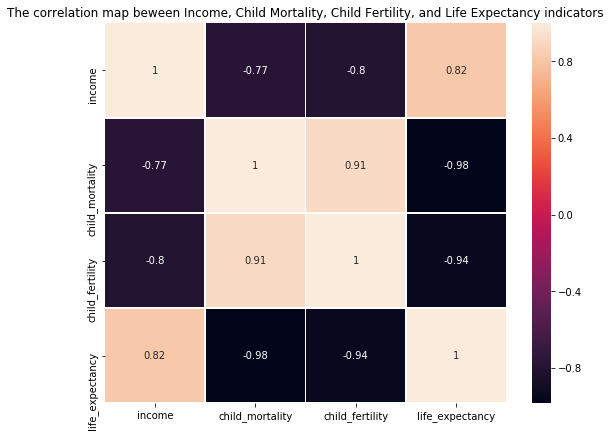

In [40]:
# plot the correlation map of all features
plt.figure(figsize=(9,7))
ax = sns.heatmap(df_four_regions.corr(), annot=True, linewidths=0.5)
ax.set_title('The correlation map beween Income, Child Mortality, Child Fertility, and Life Expectancy indicators');

It is clear from the correlation map, there is a poitive correlation between income and life expectancy, whereas there is a negative correlation between both (child mortality and fertility) and life expectancy. Next, we do scatter plots to visualize these correlations.

In [41]:
def plot_regplot(x, y, plot_style, plot_title):
    sns.set_style(plot_style)
    ax = sns.regplot(x=x, y=y, fit_reg=False)
    ax.set_title(plot_title);
    

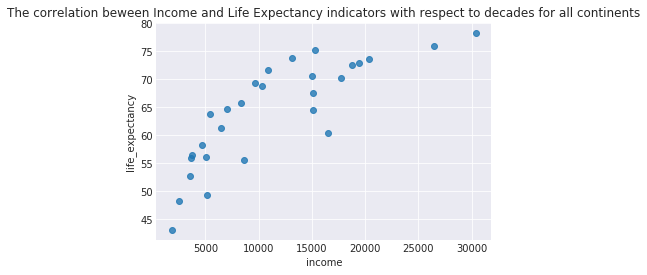

In [42]:
plot_regplot(df_four_regions["income"], df_four_regions["life_expectancy"], 'darkgrid', 'The correlation beween Income and Life Expectancy indicators with respect to decades for all continents')

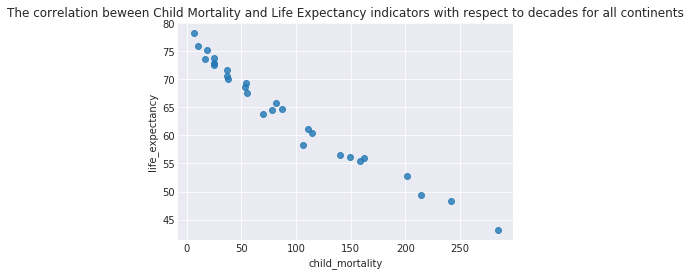

In [43]:
plot_regplot(df_four_regions["child_mortality"], df_four_regions["life_expectancy"], 'darkgrid', 'The correlation beween Child Mortality and Life Expectancy indicators with respect to decades for all continents')

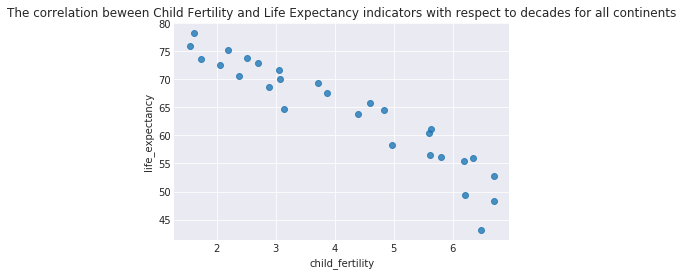

In [44]:
plot_regplot(df_four_regions["child_fertility"], df_four_regions["life_expectancy"], 'darkgrid', 'The correlation beween Child Fertility and Life Expectancy indicators with respect to decades for all continents')

So we can say in general, there is a clear trend in the globe, such that when the income increases or the child mortality and fertility decreases, then the life expectancy increases for better.

Now, we want to look at this trend for each region. To do so, we first create a separate dataframe for each region to simplify the plotting process.

In [45]:
df_africa = df_four_regions.query('four_regions == "africa"')
df_africa

income  child_mortality  child_fertility  \
four_regions year                                                        
africa       1950-01-01  1836.009259       284.638889         6.488907   
             1960-01-01  2559.150000       242.213704         6.694259   
             1970-01-01  3588.387037       201.792593         6.699593   
             1980-01-01  3648.101852       162.686852         6.340907   
             1990-01-01  3723.772222       140.272593         5.610296   
             2000-01-01  4717.694444       106.374630         4.969537   
             2010-01-01  5436.257407        69.960926         4.402463   

                         life_expectancy  
four_regions year                         
africa       1950-01-01        43.141296  
             1960-01-01        48.269259  
             1970-01-01        52.829259  
             1980-01-01        55.900000  
             1990-01-01        56.461000  
             2000-01-01        58.278519  
             2010-01-01        63.856481

In [46]:
df_asia = df_four_regions.query('four_regions == "asia"')
df_asia

income  child_mortality  child_fertility  \
four_regions year                                                         
asia         1950-01-01   5121.047170       214.138679         6.207264   
             1960-01-01   8658.505660       158.989434         6.197057   
             1970-01-01  16535.709434       114.783962         5.598075   
             1980-01-01  15079.694340        78.408000         4.838226   
             1990-01-01  15069.139623        55.615208         3.869717   
             2000-01-01  17694.288679        37.419849         3.076906   
             2010-01-01  19435.924528        25.220132         2.701283   

                         life_expectancy  
four_regions year                         
asia         1950-01-01        49.354717  
             1960-01-01        55.526604  
             1970-01-01        60.487170  
             1980-01-01        64.471132  
             1990-01-01        67.500000  
             2000-01-01        70.140755  
             2010-01-01        72.945472

In [47]:
df_americas = df_four_regions.query('four_regions == "americas"')
df_americas

income  child_mortality  child_fertility  \
four_regions year                                                         
americas     1950-01-01   5062.727273       149.842727         5.811697   
             1960-01-01   6489.181818       111.224848         5.630061   
             1970-01-01   8356.090909        82.143636         4.606212   
             1980-01-01   9610.787879        54.745697         3.723485   
             1990-01-01  10858.454545        36.579485         3.066212   
             2000-01-01  13176.727273        24.877727         2.514909   
             2010-01-01  15308.818182        18.757364         2.196758   

                         life_expectancy  
four_regions year                         
americas     1950-01-01        56.088788  
             1960-01-01        61.224848  
             1970-01-01        65.710303  
             1980-01-01        69.277879  
             1990-01-01        71.623333  
             2000-01-01        73.873030  
             2010-01-01        75.260303

In [48]:
df_europe = df_four_regions.query('four_regions == "europe"')
df_europe

income  child_mortality  child_fertility  \
four_regions year                                                         
europe       1950-01-01   7001.340909        86.825682         3.141250   
             1960-01-01  10304.431818        53.676136         2.881659   
             1970-01-01  14987.818182        36.559023         2.387341   
             1980-01-01  18744.181818        24.623364         2.056955   
             1990-01-01  20321.568182        16.946705         1.731705   
             2000-01-01  26481.886364        10.292932         1.549659   
             2010-01-01  30406.340909         6.308841         1.619364   

                         life_expectancy  
four_regions year                         
europe       1950-01-01        64.765000  
             1960-01-01        68.716364  
             1970-01-01        70.670227  
             1980-01-01        72.525000  
             1990-01-01        73.653182  
             2000-01-01        75.875682  
             2010-01-01        78.204318

The correlation is very clear from the statistics shown above. However, let us make a plot for each independent variable.

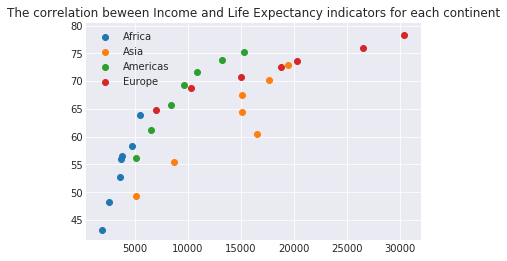

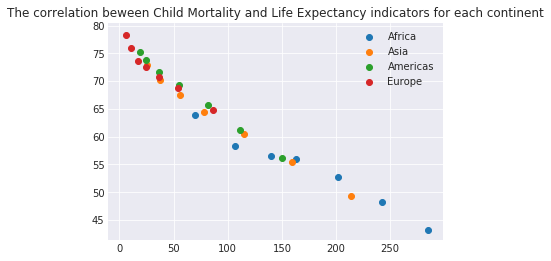

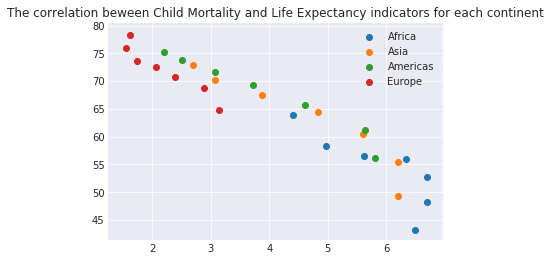

In [49]:
# pack regions dataframes in a list to be used to plot figures
df_list = [df_africa, df_asia, df_americas, df_europe]

# scatter plots labels
region_legend = ['Africa', 'Asia', 'Americas', 'Europe']

def plot_scatter(x, y, label):
    plt.scatter(x=x, y=y, label=label);
    
def plot_scatter_for_four_regions(dataframes, x_label, y_label, plot_legend, plot_title):
    for i, df in enumerate(dataframes):
        x = df[x_label]
        y = df[y_label]
        label = plot_legend[i]
        plot_scatter(x=x, y=y, label=label)
    plt.title(plot_title)
    plt.legend(loc='best')
    plt.show()
    
plot_scatter_for_four_regions(df_list, 'income', 'life_expectancy', region_legend, 'The correlation beween Income and Life Expectancy indicators for each continent')
plot_scatter_for_four_regions(df_list, 'child_mortality', 'life_expectancy', region_legend, 'The correlation beween Child Mortality and Life Expectancy indicators for each continent')
plot_scatter_for_four_regions(df_list, 'child_fertility', 'life_expectancy', region_legend, 'The correlation beween Child Mortality and Life Expectancy indicators for each continent')


### Question 2

#### Have certain regions of the world been growing relatively better than others with respect to the Life expectancy and the other three independent variables?

In [50]:
df_africa

income  child_mortality  child_fertility  \
four_regions year                                                        
africa       1950-01-01  1836.009259       284.638889         6.488907   
             1960-01-01  2559.150000       242.213704         6.694259   
             1970-01-01  3588.387037       201.792593         6.699593   
             1980-01-01  3648.101852       162.686852         6.340907   
             1990-01-01  3723.772222       140.272593         5.610296   
             2000-01-01  4717.694444       106.374630         4.969537   
             2010-01-01  5436.257407        69.960926         4.402463   

                         life_expectancy  
four_regions year                         
africa       1950-01-01        43.141296  
             1960-01-01        48.269259  
             1970-01-01        52.829259  
             1980-01-01        55.900000  
             1990-01-01        56.461000  
             2000-01-01        58.278519  
             2010-01-01        63.856481

In [51]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, (africa, 1950-01-01 00:00:00) to (africa, 2010-01-01 00:00:00)
Data columns (total 4 columns):
income             7 non-null float64
child_mortality    7 non-null float64
child_fertility    7 non-null float64
life_expectancy    7 non-null float64
dtypes: float64(4)
memory usage: 660.0+ bytes


To answer this question, we first need to remove the first level of MulitIndex column for each region's dataframe, and change the datatype of *year* column to *int*, so we can plot by decade.

In [52]:
def reformat_region_dataframes(df):
    df.index = df.index.droplevel(0)
    df = df.reset_index()
    df.year = df.year.dt.year
    
    return df

df_africa = reformat_region_dataframes(df_africa)
df_asia = reformat_region_dataframes(df_asia)
df_americas = reformat_region_dataframes(df_americas)
df_europe = reformat_region_dataframes(df_europe)

In [53]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
year               7 non-null int64
income             7 non-null float64
child_mortality    7 non-null float64
child_fertility    7 non-null float64
life_expectancy    7 non-null float64
dtypes: float64(4), int64(1)
memory usage: 360.0 bytes


In [54]:
df_asia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
year               7 non-null int64
income             7 non-null float64
child_mortality    7 non-null float64
child_fertility    7 non-null float64
life_expectancy    7 non-null float64
dtypes: float64(4), int64(1)
memory usage: 360.0 bytes


In [55]:
df_americas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
year               7 non-null int64
income             7 non-null float64
child_mortality    7 non-null float64
child_fertility    7 non-null float64
life_expectancy    7 non-null float64
dtypes: float64(4), int64(1)
memory usage: 360.0 bytes


In [56]:
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
year               7 non-null int64
income             7 non-null float64
child_mortality    7 non-null float64
child_fertility    7 non-null float64
life_expectancy    7 non-null float64
dtypes: float64(4), int64(1)
memory usage: 360.0 bytes


In [57]:
df_africa

,year,income,child_mortality,child_fertility,life_expectancy
0,1950,1836.009259,284.638889,6.488907,43.141296
1,1960,2559.150000,242.213704,6.694259,48.269259
2,1970,3588.387037,201.792593,6.699593,52.829259
3,1980,3648.101852,162.686852,6.340907,55.900000
4,1990,3723.772222,140.272593,5.610296,56.461000
5,2000,4717.694444,106.374630,4.969537,58.278519
6,2010,5436.257407,69.960926,4.402463,63.856481


In [58]:
df_asia

,year,income,child_mortality,child_fertility,life_expectancy
0,1950,5121.047170,214.138679,6.207264,49.354717
1,1960,8658.505660,158.989434,6.197057,55.526604
2,1970,16535.709434,114.783962,5.598075,60.487170
3,1980,15079.694340,78.408000,4.838226,64.471132
4,1990,15069.139623,55.615208,3.869717,67.500000
5,2000,17694.288679,37.419849,3.076906,70.140755
6,2010,19435.924528,25.220132,2.701283,72.945472


In [59]:
df_americas

,year,income,child_mortality,child_fertility,life_expectancy
0,1950,5062.727273,149.842727,5.811697,56.088788
1,1960,6489.181818,111.224848,5.630061,61.224848
2,1970,8356.090909,82.143636,4.606212,65.710303
3,1980,9610.787879,54.745697,3.723485,69.277879
4,1990,10858.454545,36.579485,3.066212,71.623333
5,2000,13176.727273,24.877727,2.514909,73.873030
6,2010,15308.818182,18.757364,2.196758,75.260303


In [60]:
df_europe

,year,income,child_mortality,child_fertility,life_expectancy
0,1950,7001.340909,86.825682,3.141250,64.765000
1,1960,10304.431818,53.676136,2.881659,68.716364
2,1970,14987.818182,36.559023,2.387341,70.670227
3,1980,18744.181818,24.623364,2.056955,72.525000
4,1990,20321.568182,16.946705,1.731705,73.653182
5,2000,26481.886364,10.292932,1.549659,75.875682
6,2010,30406.340909,6.308841,1.619364,78.204318


We then scatter plot by decades for each indicator and for each individual region.

In [61]:
# pack regions dataframes in a list to be used to plot figures
df_list = [df_africa, df_asia, df_americas, df_europe]

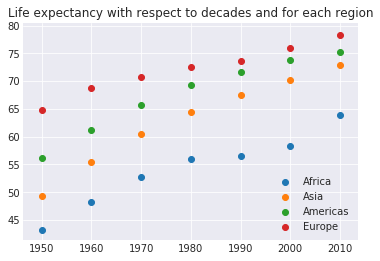

In [62]:
plot_scatter_for_four_regions(df_list, 'year', 'life_expectancy', region_legend, 'Life expectancy with respect to decades and for each region')

From the above figure, Asia is the most growing region with respect to the *Life expectancy* factor. However, Europe stayed in the first place, and Americas comes next, followed by Asia. Africa also has improved but stayed far away from other regions.

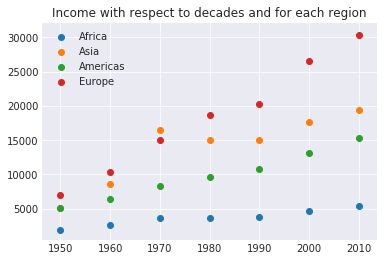

In [63]:
plot_scatter_for_four_regions(df_list, 'year', 'income', region_legend, 'Income with respect to decades and for each region')

In terms of the *Income* factor, Europe is growing the most, followed by Asia and Americas. But Aferica is improving a little bit.

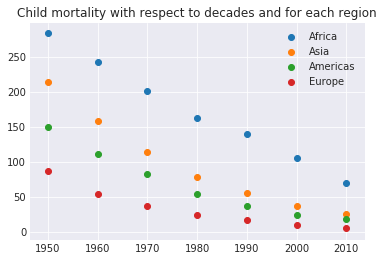

In [64]:
plot_scatter_for_four_regions(df_list, 'year', 'child_mortality', region_legend, 'Child mortality with respect to decades and for each region')

With much advancements in science, technology, and health systems, all regions have decreased *Child* mortality rate almost constantly. However, Europe is still in the first place, followed by Americas, then Asia, and Africa comes in the last place.

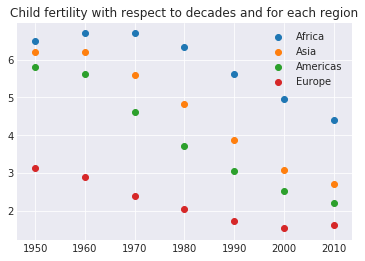

In [65]:
plot_scatter_for_four_regions(df_list, 'year', 'child_fertility', region_legend, 'Child fertility with respect to decades and for each region')

Having many children for each family is a good thing. However, this means that the income per individual will decrease, leading to a decrease in life conditions, which means less education opportunties and low quality health insurance. As a result, the child mortality rate will increase, followed by a decrease in life expectancy rate too.

From the above figure, Europe has the lowest *Child fertility* rate, followed again by Americas and Asia. Africa still has the highest *Child fertility* rate.

### 3D Plotting

Finally, we can clearly see our findings for the two questions above through **3D** plots that show the correlation between *Life expectancy* and each of the other three independent variables.

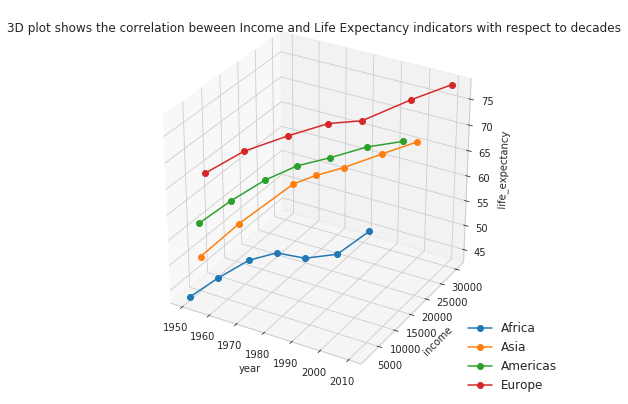

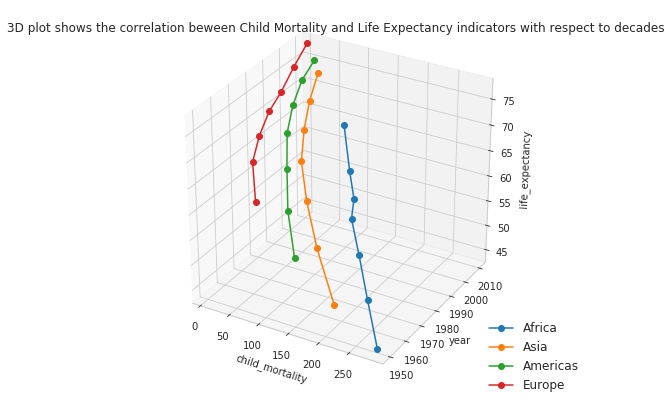

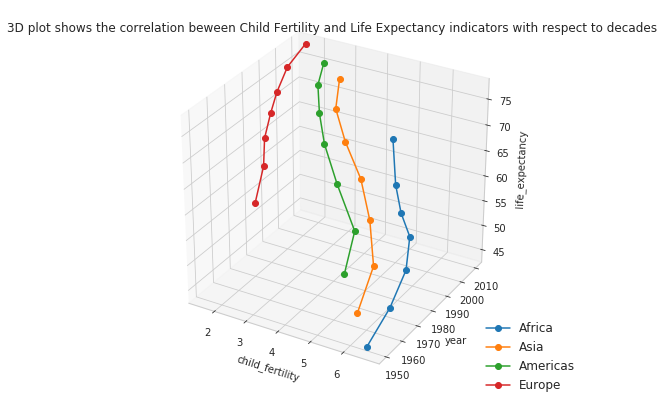

In [66]:
def plot_3d(axes_plot, x, y, z, label):
    axes_plot.plot3D(x, y, z, label=label, marker='o');
    
def plot_3d_for_four_regions(dataframes, x_label, y_label, z_label, plot_legend, plot_title):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection ='3d')
    
    for i, df in enumerate(dataframes):
        x = df[x_label]
        y = df[y_label]
        z = df[z_label]
        label = plot_legend[i]
        plot_3d(axes_plot=ax, x=x, y=y, z=z, label=label)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(plot_title) 
    plt.rcParams['legend.fontsize'] = 12
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 0.2))
    plt.show()
    
plot_3d_for_four_regions(df_list, 'year', 'income', 'life_expectancy', region_legend, '3D plot shows the correlation beween Income and Life Expectancy indicators with respect to decades')
plot_3d_for_four_regions(df_list, 'child_mortality', 'year', 'life_expectancy', region_legend, '3D plot shows the correlation beween Child Mortality and Life Expectancy indicators with respect to decades')
plot_3d_for_four_regions(df_list, 'child_fertility', 'year', 'life_expectancy', region_legend, '3D plot shows the correlation beween Child Fertility and Life Expectancy indicators with respect to decades')

<a id='conclusions'></a>
## Conclusions

We aimed in this project to study the effect of the factors (*Income*, *Child mortality*, *Child fertility*) on the *Life* expectancy in general and according to individual regions. We also aimed to find which regions are improving the most with repect to these factors.

We have answered both research questions posed at the end of the *introduction* section by conducting an intensive EDA. We used both statistics and visualization tehniques to show our findings.

In summary, we have found that the life expectancy rate increases when there is an increase in the income. It also increases when there are decreases in both child mortality and fertility rates.

Europe has kept the best life expectancy and income rates through the time. Asia and Americas are immediately following Europe and almost have catched up with it in life expectancy rates. But Africa has the worst ones. The child mortality and fertility rates have increased much for Asia and Americas. Europe still has the least ones, whereas Africa has the higher ones.

### Limitaion

We will address here some of the limitations and challenges that we faced while doing this study.

<ul>
<li>It was a challenging task to pick only a few indicators from the tens or even hundres of different indicators that are grouped into different categories too, like education, health, ets. But at the end, we have selected six indicators that they seem to be related to each other. However, we ended with only four indicators, as we find from the initial analysis that the other two indicators (Popluation total and Population density) are not useful in this work.</li>
<li>Another limitation was related to the availablity of data for all picked indicators. We had to consider only data from 1950. Although most countries have statistics go back to 1800, some countries have complete statistics for some indicators for some years but do not have complete statistics for some other years.</li>
<li>We had to drop some countires from this study because they do not have complete statistics for the period of the study.</li>
<li>We choose to study the impact of some indicators on the life expectancy of people of the main four continents. We covered a period of seventy years. However, we faced a problem related to how to plot data for seventy years and for each region. This needs huge figures that cannot be shown clearly on the screen. To overcome this issue, we aggregated data for every ten years and for each region. Thus, our results may not reflect the real data</li>
<li>We choose to conduct the study for the main continents: Africa, Asia, Americas and Europe. However, some sub-regions within each continent are much better than others with most indicators. For example, if we represent each of North America and South America separately, we might get different results. In the future, we plan to conduct this study based on eight regions instead of four, and sure we might get different results. </li>
</ul>


<a id='references'></a>
## References

<ul>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html">Pandas reshaping</a></li>
    <li><a href="https://jamesrledoux.com/code/group-by-aggregate-pandas">Pandas groupby and aggregate for time series</a></li>
    <li><a href="https://stackoverflow.com/questions/44627970/drop-multiindex-level-but-keep-names-of-columns-pandas">Pandas drop MultiIndex levels</a></li>
    <li><a href="https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/">3D plotting using matplotlib</a></li>
    <li><a href="https://pythonprogramming.net/3d-graphing-pandas-matplotlib/">3D plotting using matplotlib</a></li>
</ul>

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0